In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
data = pd.read_csv('winequality.csv')

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

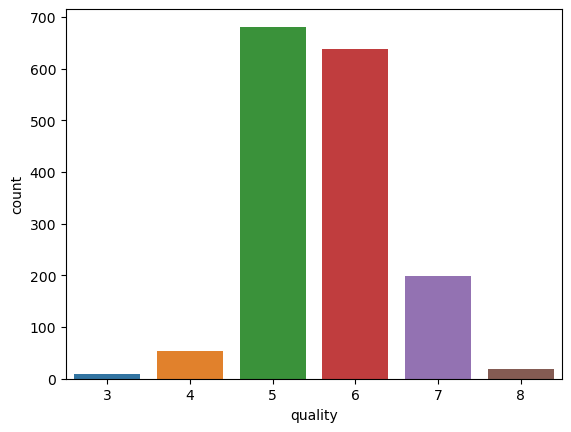

In [9]:
sns.countplot('quality',data=data)

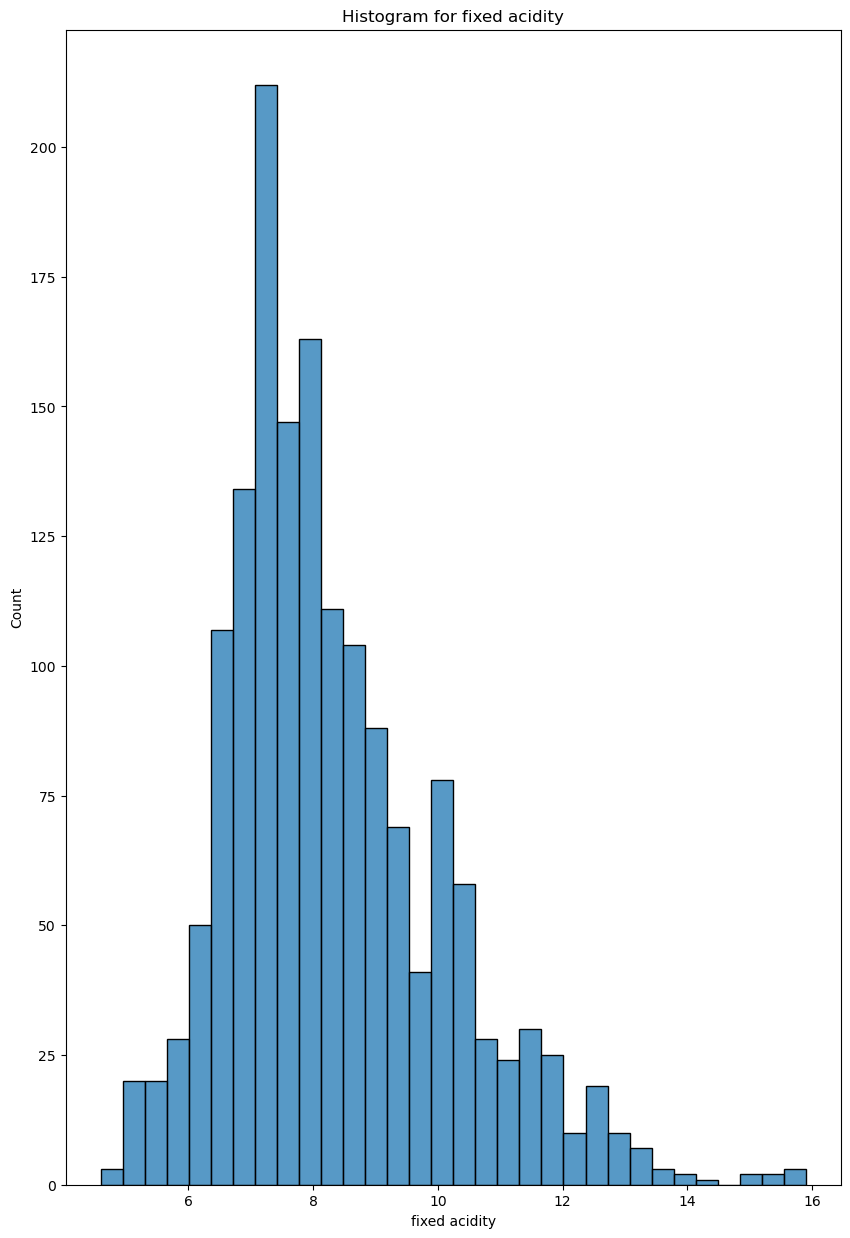

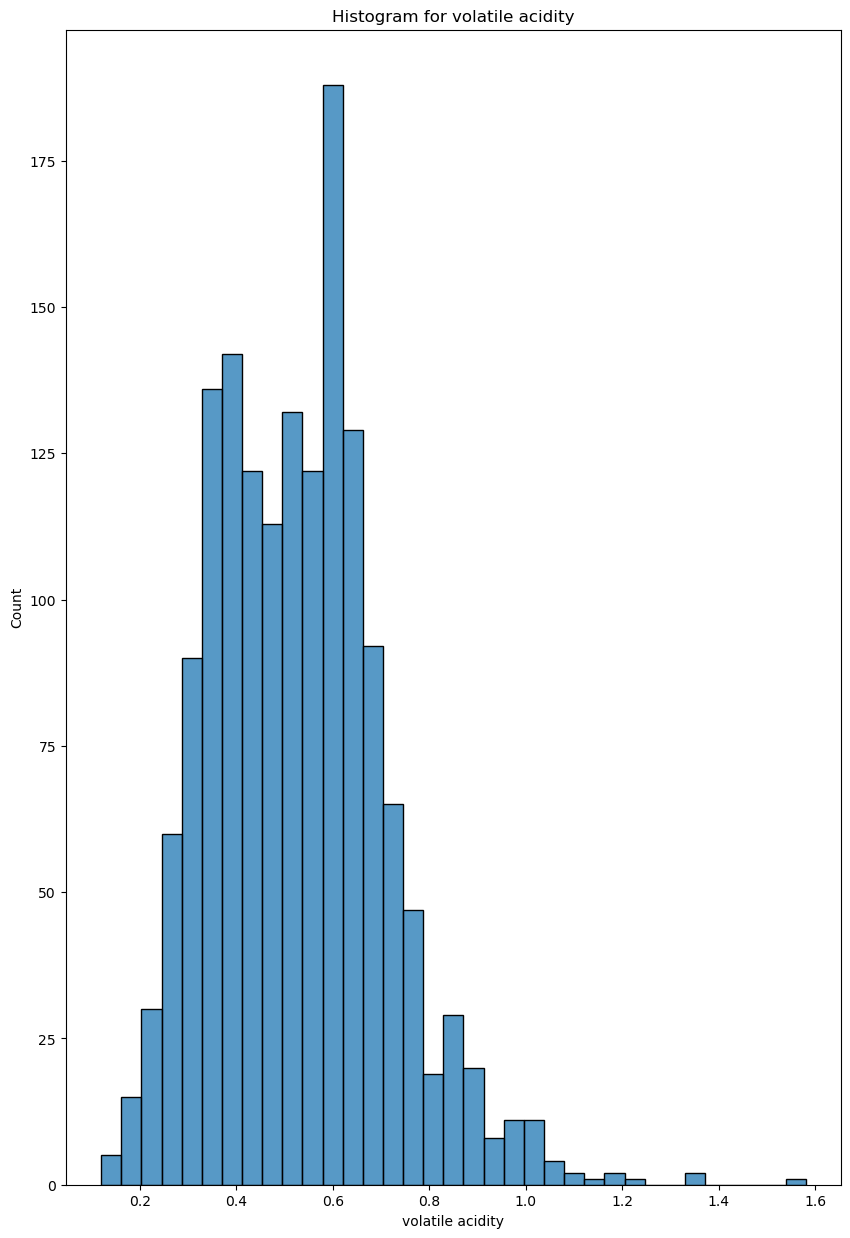

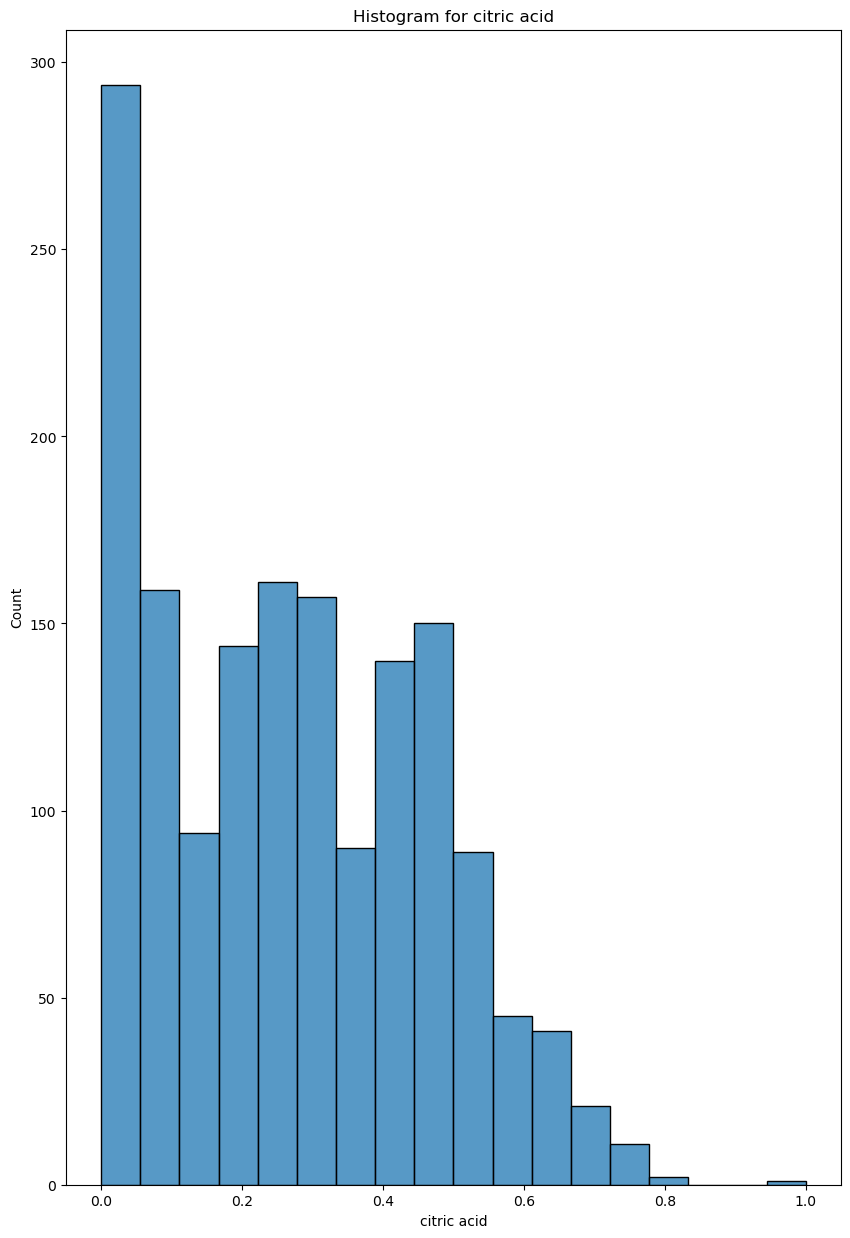

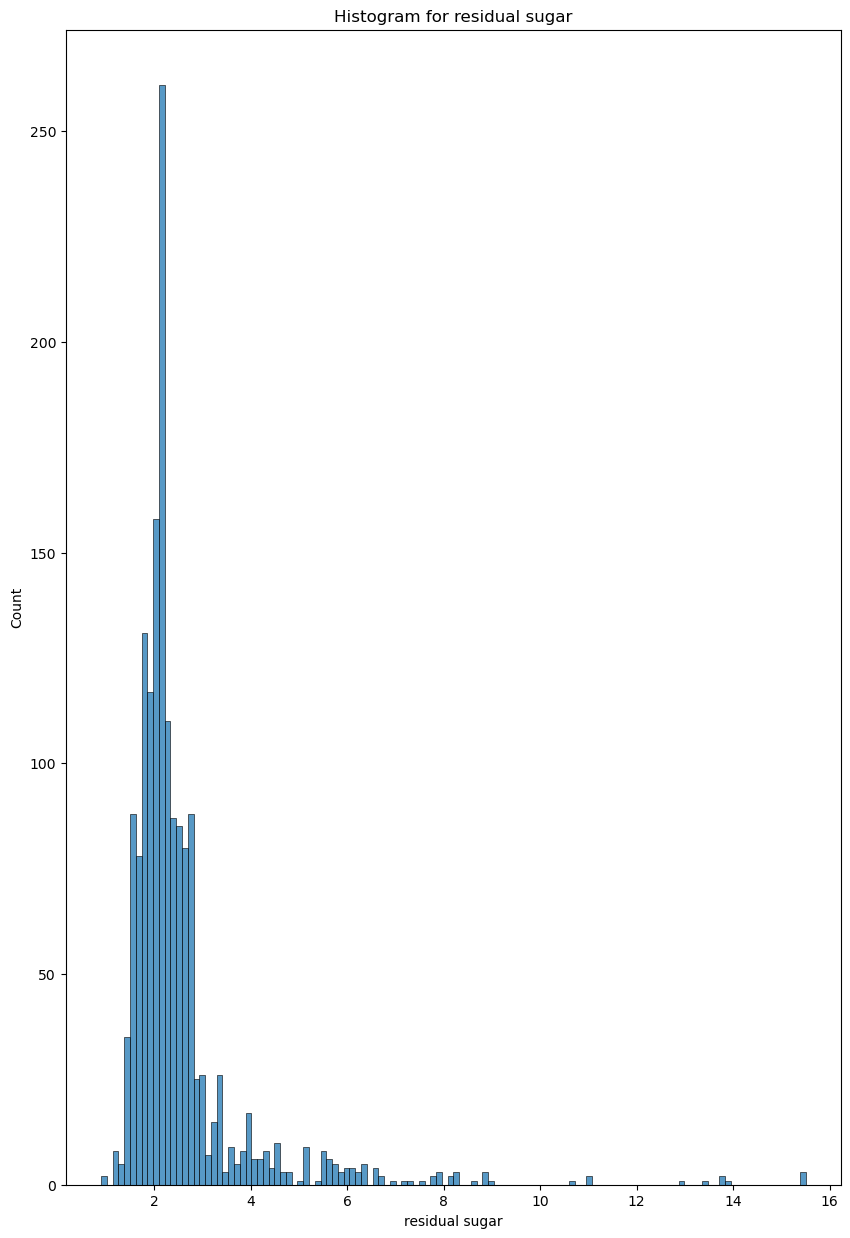

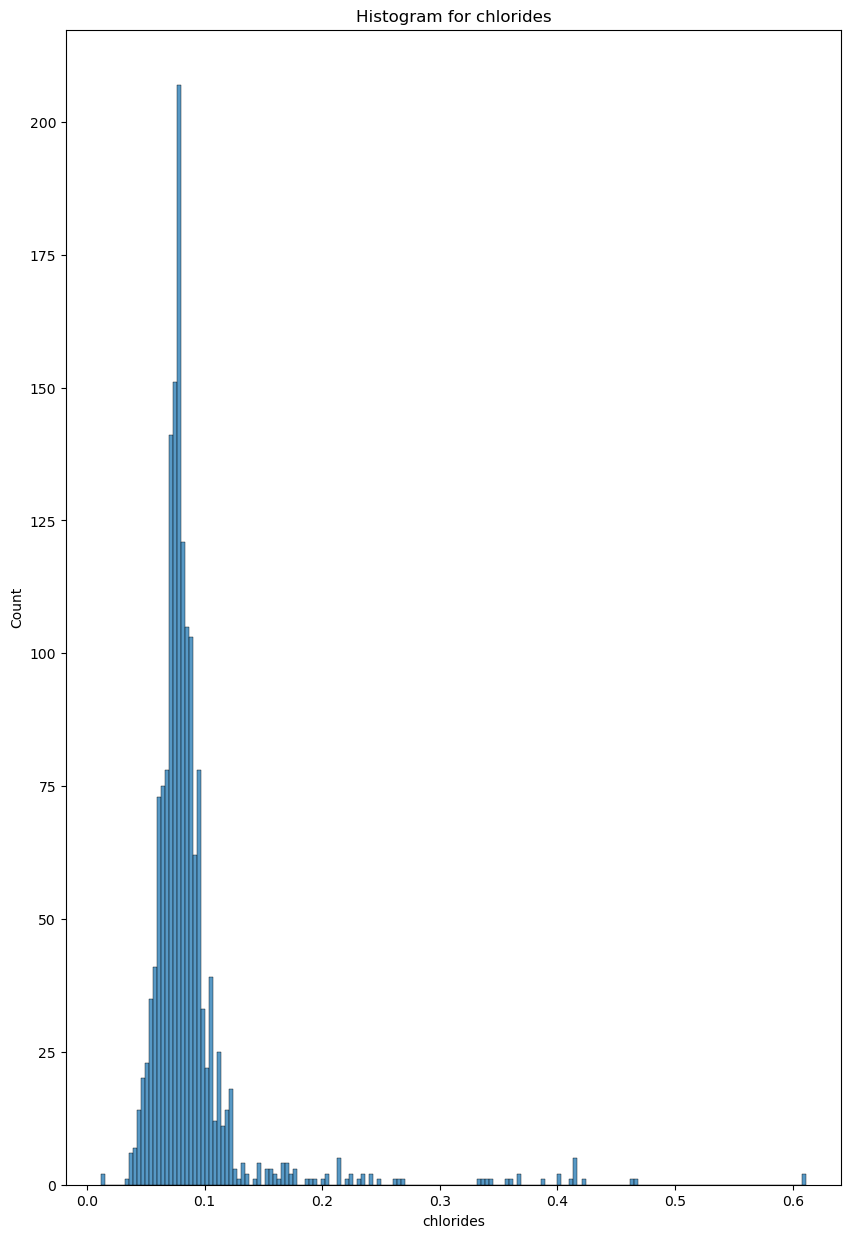

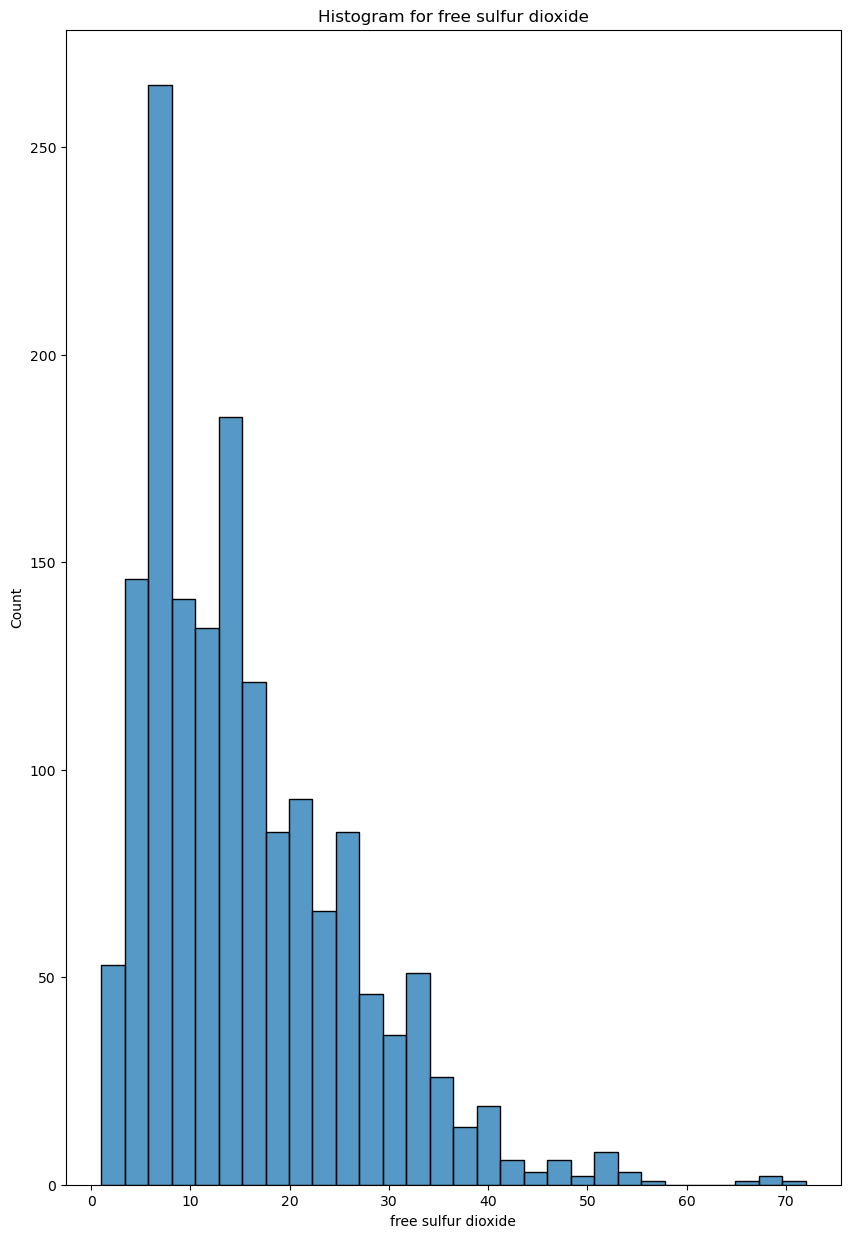

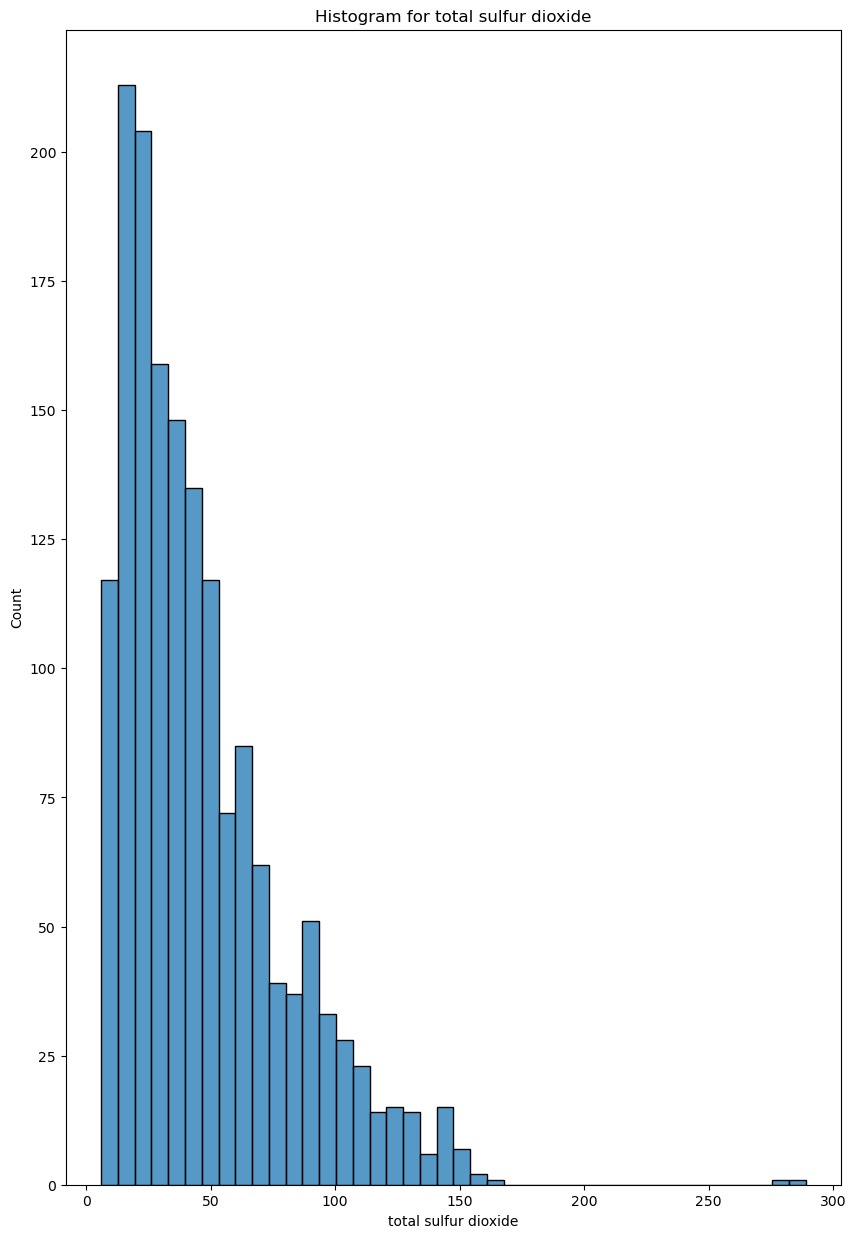

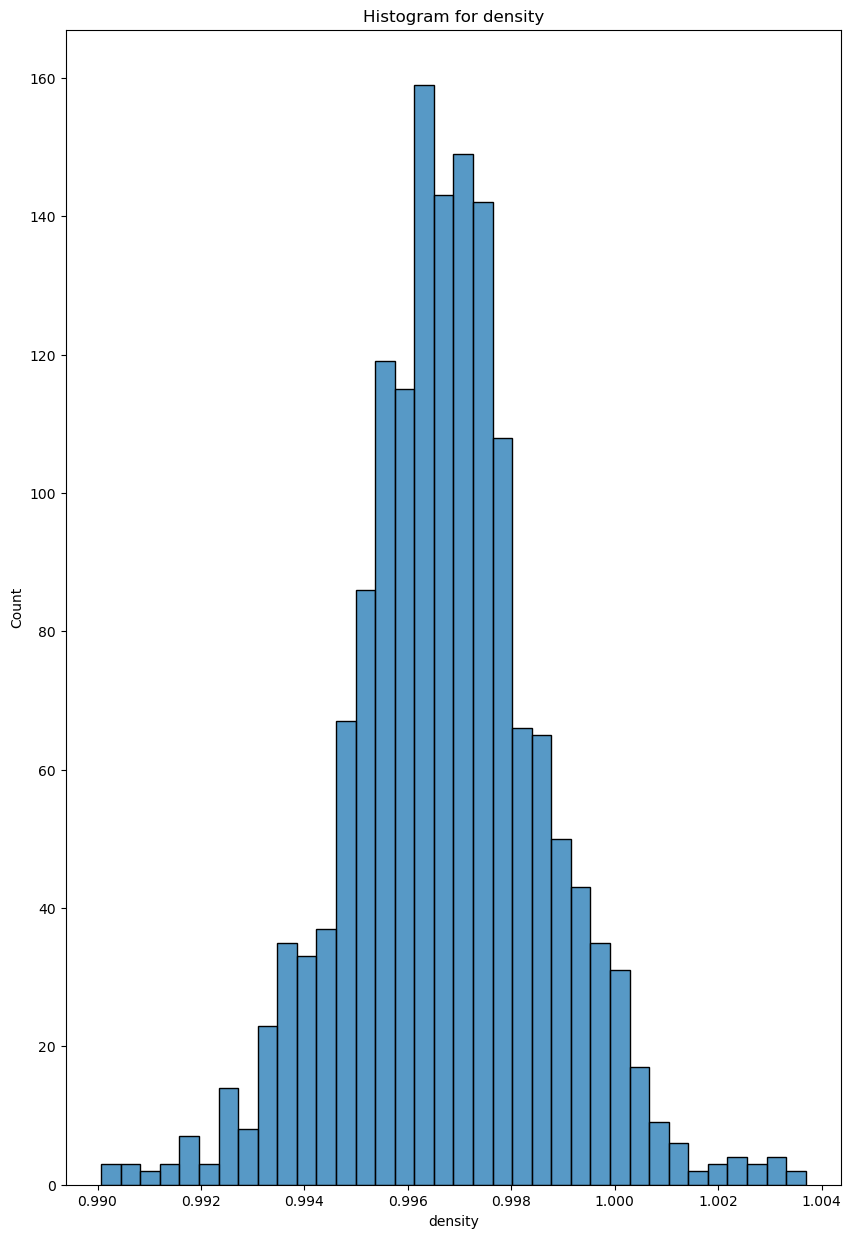

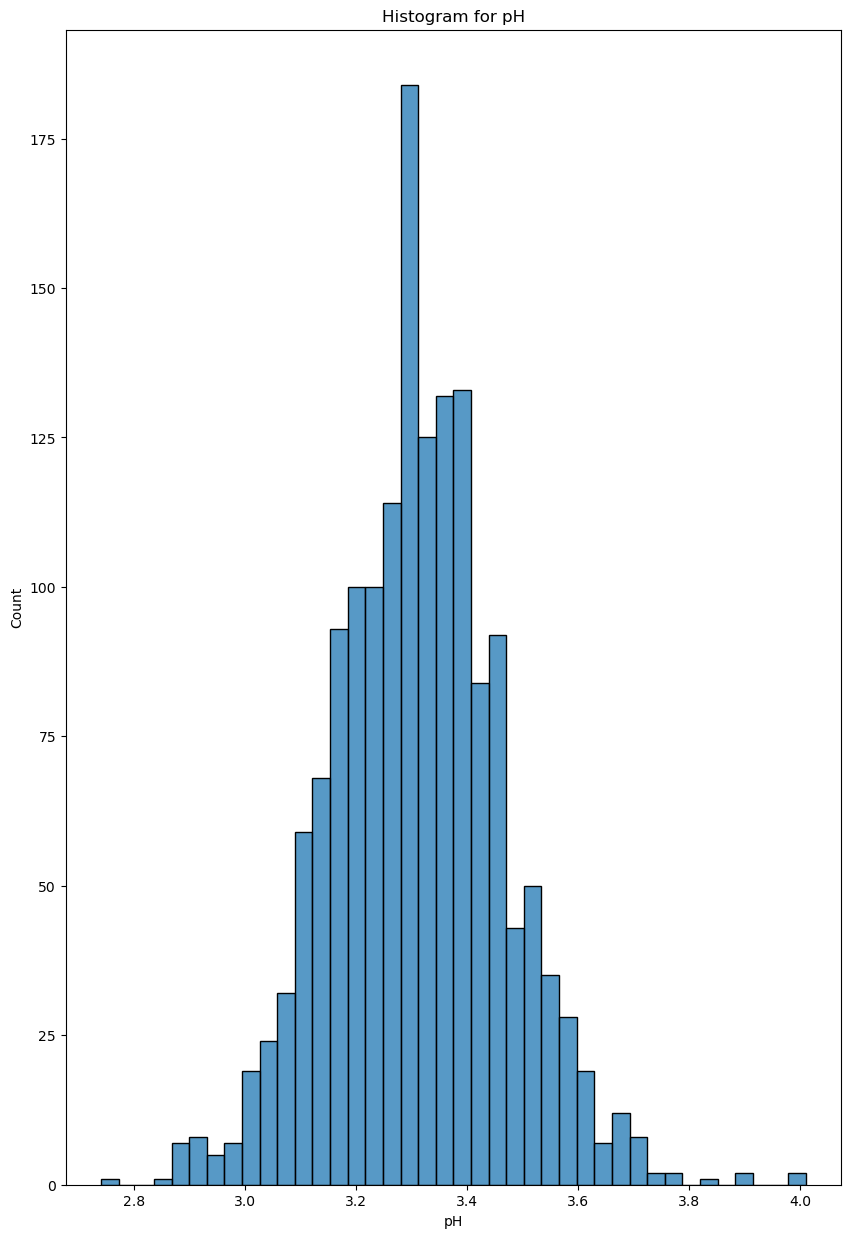

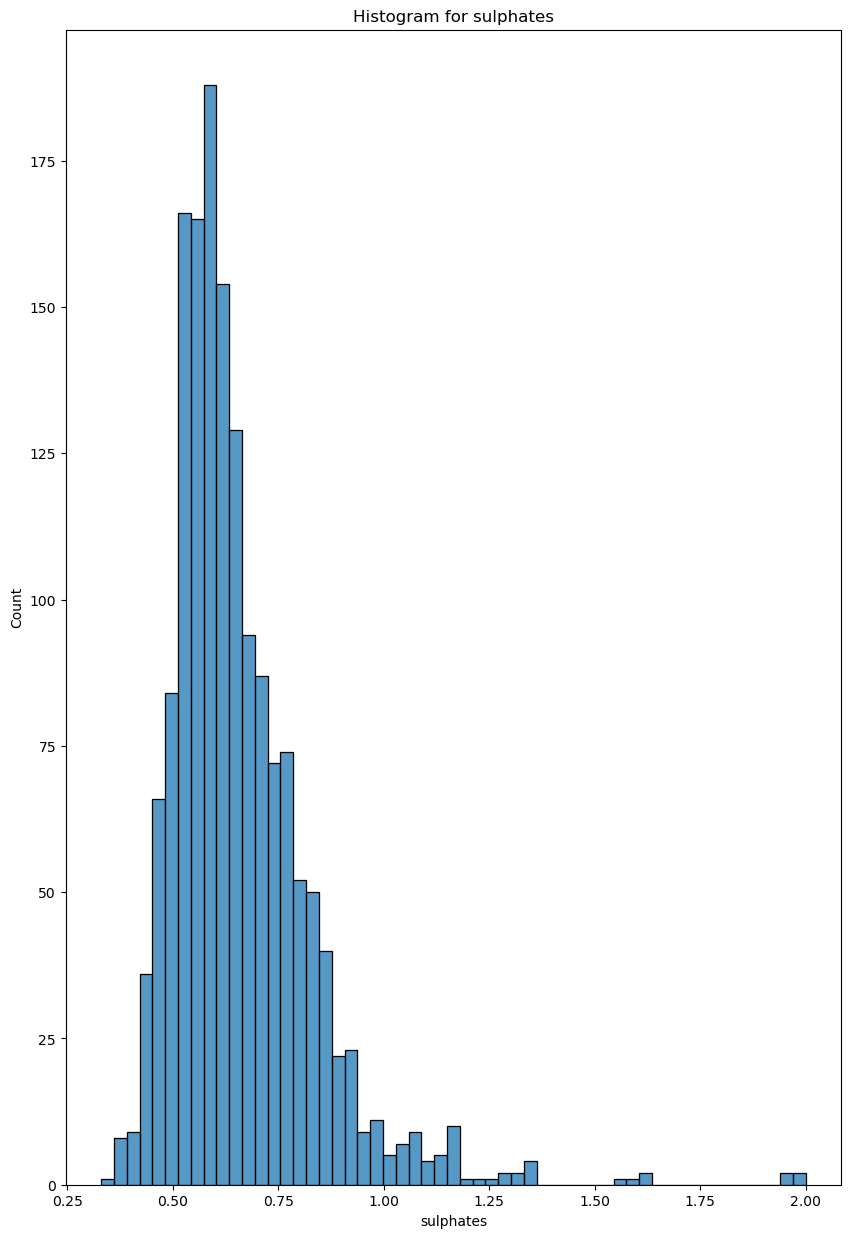

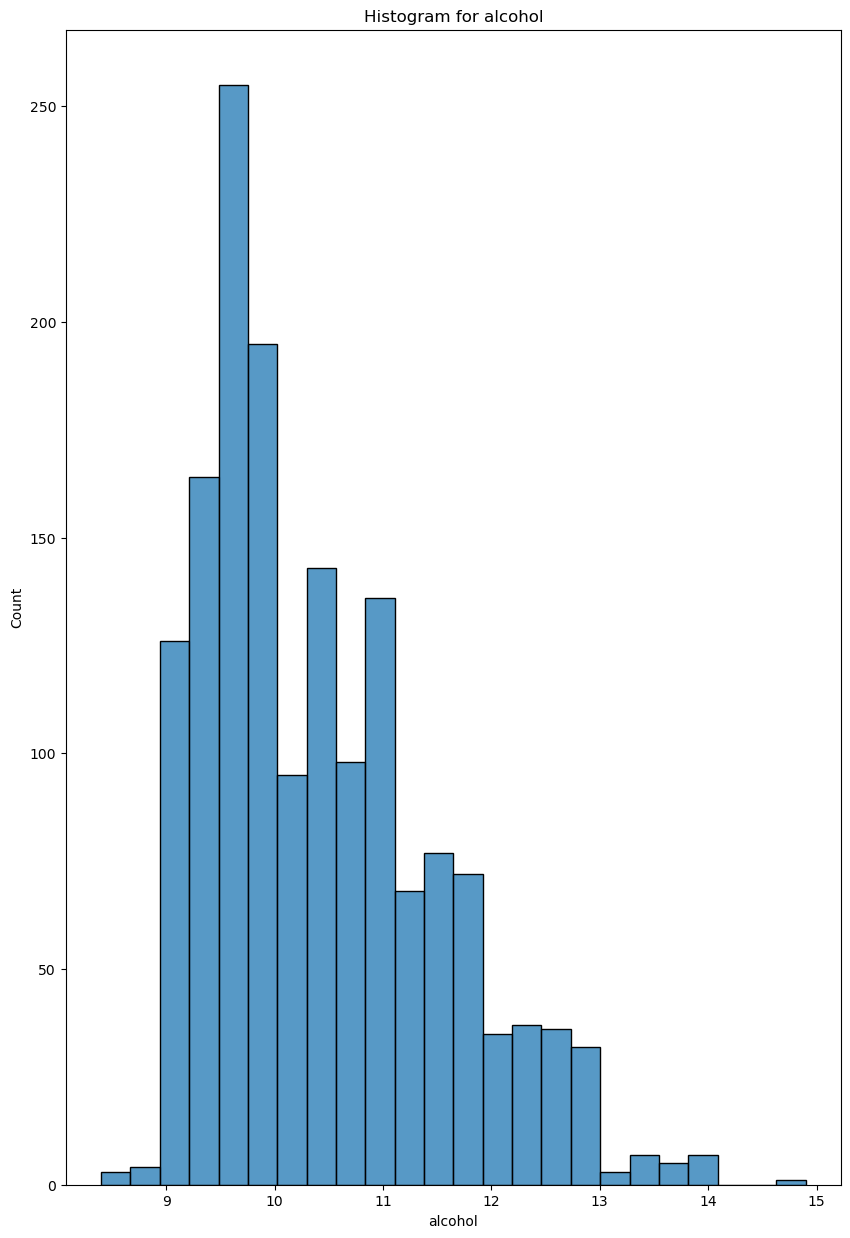

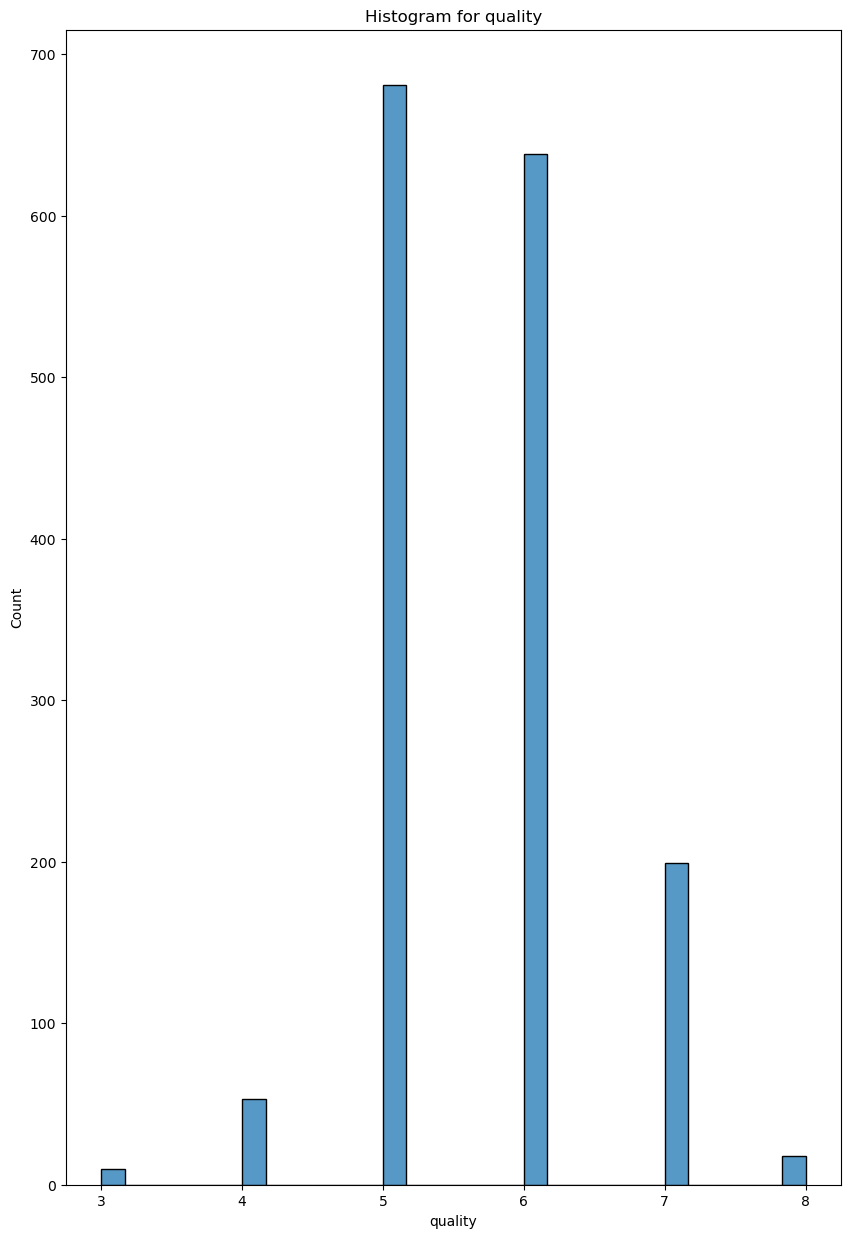

In [10]:
for i in data.columns:
    plt.figure(figsize=(10,15))
    sns.histplot(data[i])
    plt.title(f'Histogram for {i}')
    

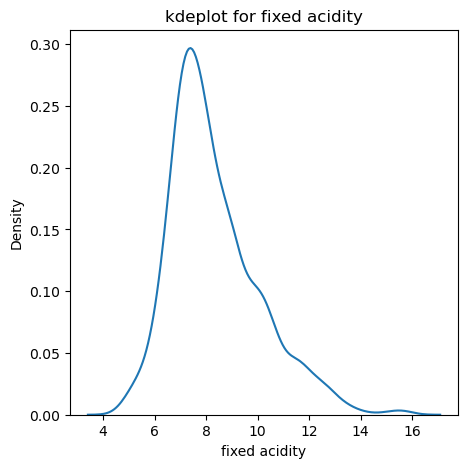

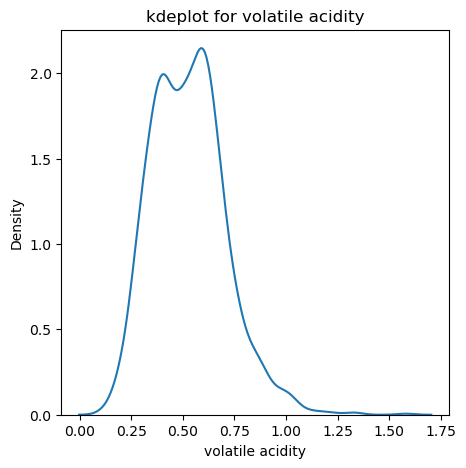

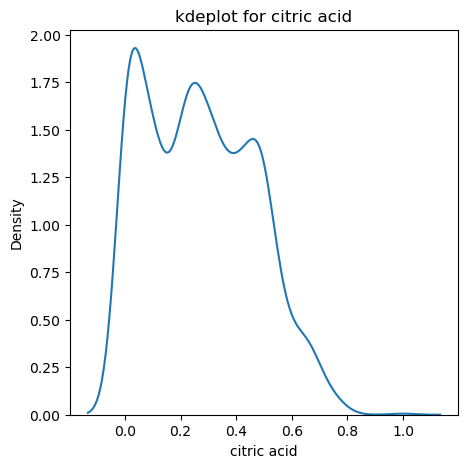

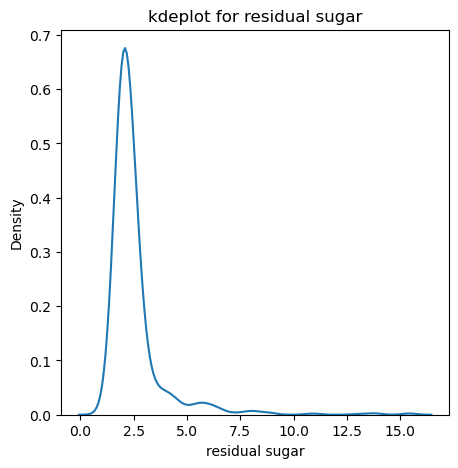

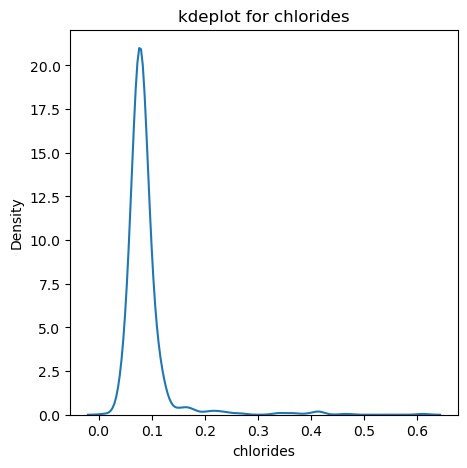

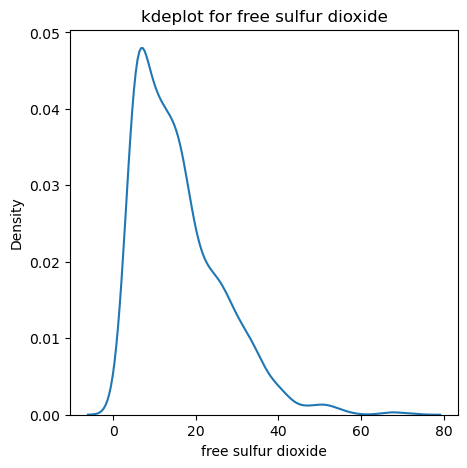

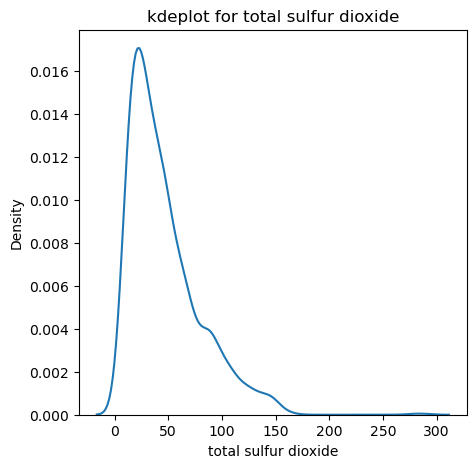

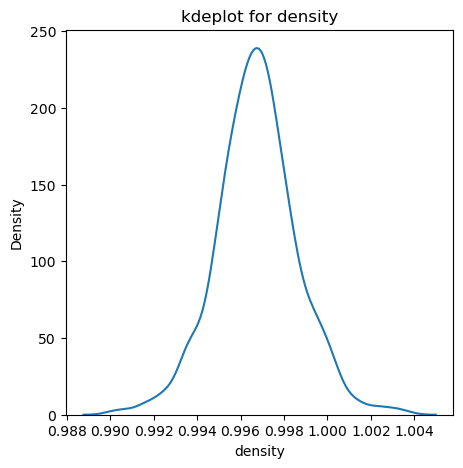

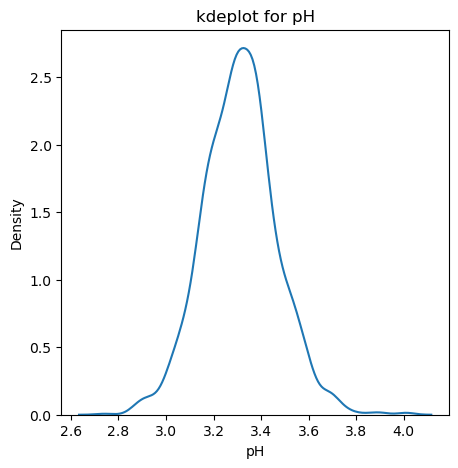

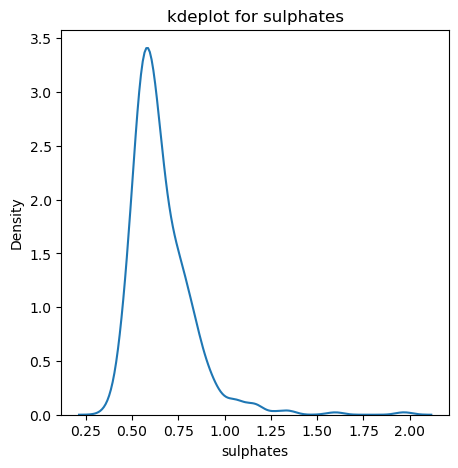

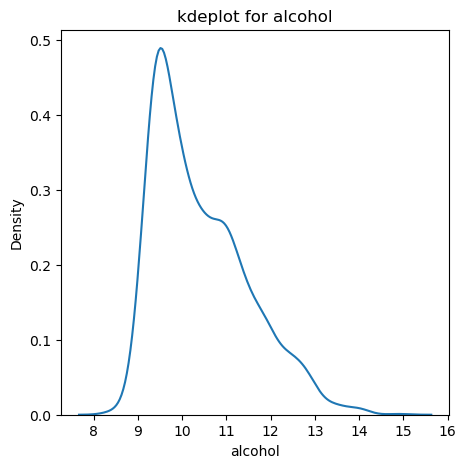

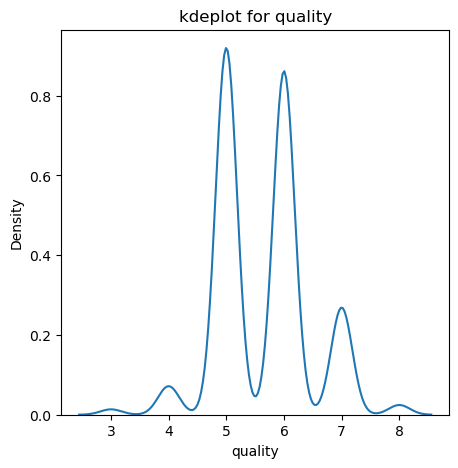

In [11]:
for i in data.columns:
    plt.figure(figsize=(5,5))
    sns.kdeplot(data[i])
    plt.title(f'kdeplot for {i}')

# to find outlier

In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3-Q1
IQR

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64

In [13]:
print(data<(Q1-1.5*IQR)|(data<Q3-1.5*IQR))

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             False              True         True           False       True   
1             False              True         True           False       True   
2             False              True         True           False       True   
3             False              True         True           False       True   
4             False              True         True           False       True   
...             ...               ...          ...             ...        ...   
1594          False              True         True           False       True   
1595          False              True         True           False       True   
1596          False              True         True           False       True   
1597          False              True         True           False       True   
1598          False              True         True           False       True   

      free sulfur dioxide  

In [14]:
outliers = (data<(Q1-1.5*IQR)|(data<Q3-1.5*IQR))

In [15]:
data = data[data!=outliers]

In [16]:
corr = data.corr()['quality'].drop('quality')
corr

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64

<AxesSubplot:>

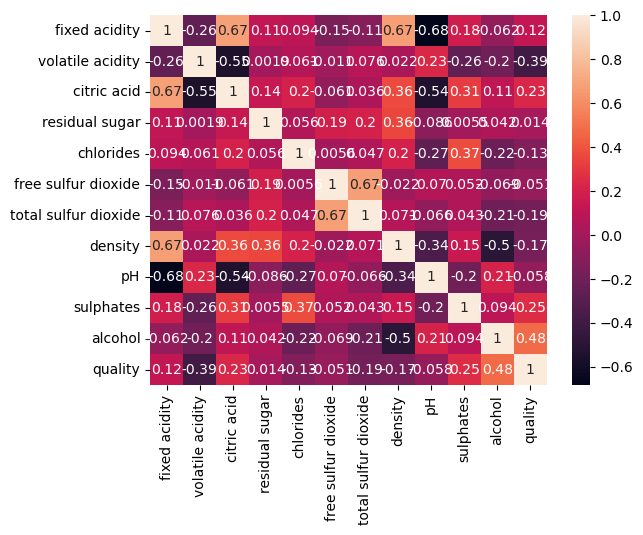

In [17]:
sns.heatmap(data.corr(),annot=True)

In [18]:
corr.sort_values(ascending=False)

alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [19]:
def features(corr_threshold):
    abs_corr = corr.abs()
    high_corr = abs_corr[abs_corr>corr_threshold].index.values.tolist()
    return high_corr

In [20]:
features = features(0.05)
print(features)

x = data[features]
y = data['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


[Text(0.5, 0, 'quality'), Text(0, 0.5, 'alcohol')]

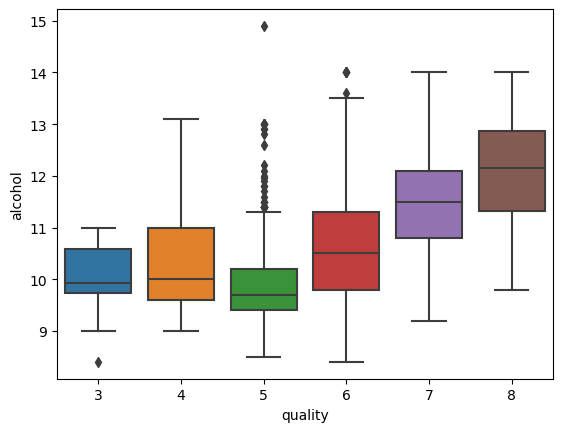

In [21]:
ax = sns.boxplot(x='quality',y='alcohol',data=data)
ax.set(xlabel='quality',ylabel='alcohol')

[Text(0.5, 0, 'quality'), Text(0, 0.5, 'citric acid')]

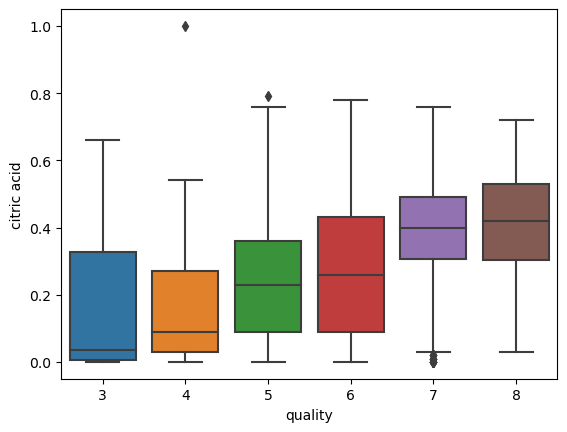

In [22]:
ax = sns.boxplot(x='quality',y='citric acid',data=data)
ax.set(xlabel='quality',ylabel='citric acid')

[Text(0.5, 0, 'quality'), Text(0, 0.5, 'acidity')]

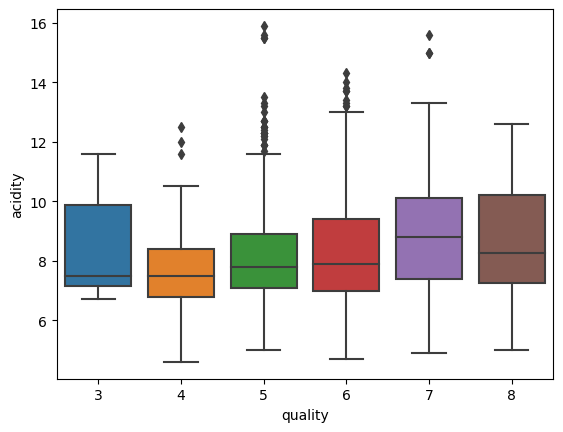

In [23]:
ax = sns.boxplot(x='quality',y='fixed acidity',data=data)
ax.set(xlabel='quality',ylabel='acidity')

In [24]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [25]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [26]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=3)

In [28]:
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [29]:
model.intercept_

-9.357546307307766

In [31]:
model.coef_

array([ 2.09748604e-03, -9.91919438e-01, -1.59101559e-01, -1.60571078e+00,
        7.14909239e-03, -4.21570406e-03,  1.36683325e+01, -4.91369830e-01,
        8.06320421e-01,  3.10221686e-01])

In [36]:
test_pred = model.predict(xtest)

In [37]:
test_pred

array([5.07910058, 5.62380239, 5.91237814, 6.13377636, 5.00191955,
       5.47983397, 5.09458508, 6.16211739, 5.52100318, 5.77981402,
       5.63158118, 5.18832504, 5.23605007, 5.30930873, 6.49057833,
       5.05808091, 5.86879888, 5.17699959, 6.03333933, 6.36018142,
       6.43248508, 5.49131523, 5.80879679, 4.9246651 , 5.15488013,
       5.48825294, 5.13388325, 6.54813982, 5.84170477, 5.77246083,
       6.09592982, 6.28157158, 4.90826593, 5.89701596, 5.11582861,
       5.96597516, 6.8031869 , 4.98500735, 5.25198017, 5.89701596,
       5.17913608, 4.84122517, 6.47118035, 5.4213179 , 5.33153762,
       5.8282316 , 5.72980704, 5.26522235, 5.26674355, 5.48109897,
       5.09687802, 5.57854072, 6.01218424, 6.31498327, 5.48499158,
       5.39844049, 5.11432373, 4.88723229, 5.20305011, 5.08478631,
       4.74903013, 5.42348657, 5.25464531, 5.68502061, 5.87495001,
       6.52284779, 5.38536498, 5.72740512, 5.17508617, 5.98152118,
       5.65530981, 5.62753656, 5.72981833, 5.26542864, 6.00236

In [41]:
train_rmse = metrics.mean_squared_error(ytest,test_pred)**0.5
train_rmse

0.6315474984672367

In [44]:
#rounding off predicted values 

pred_data = np.round(test_pred)
pred_data

array([5., 6., 6., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 5., 6., 5., 6.,
       5., 6., 6., 6., 5., 6., 5., 5., 5., 5., 7., 6., 6., 6., 6., 5., 6.,
       5., 6., 7., 5., 5., 6., 5., 5., 6., 5., 5., 6., 6., 5., 5., 5., 5.,
       6., 6., 6., 5., 5., 5., 5., 5., 5., 5., 5., 5., 6., 6., 7., 5., 6.,
       5., 6., 6., 6., 6., 5., 6., 6., 5., 6., 6., 6., 6., 5., 5., 6., 6.,
       5., 5., 6., 5., 6., 6., 6., 6., 5., 5., 5., 5., 5., 6., 7., 6., 6.,
       6., 6., 6., 5., 5., 5., 5., 6., 6., 5., 6., 6., 5., 5., 5., 5., 6.,
       6., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 5., 5., 6., 6., 7., 6.,
       6., 6., 5., 5., 6., 7., 5., 5., 6., 5., 6., 6., 7., 5., 5., 5., 6.,
       5., 5., 6., 6., 5., 5., 6., 6., 6., 6., 6., 6., 5., 6., 5., 5., 6.,
       6., 7., 5., 6., 6., 5., 6., 6., 5., 6., 7., 5., 6., 6., 6., 6., 6.,
       5., 6., 6., 6., 7., 5., 5., 5., 5., 5., 6., 6., 5., 5., 5., 6., 6.,
       5., 6., 5., 6., 5., 5., 6., 6., 6., 6., 6., 6., 6., 5., 5., 5., 5.,
       5., 6., 5., 6., 5.

In [50]:
print('Mean Absolute Error:',metrics.mean_absolute_error(ytest,test_pred))
print('Mean Squared Error:',metrics.mean_squared_error(ytest,test_pred))
rmse = np.sqrt(metrics.mean_squared_error(ytest,test_pred))
print('Root mean squared error:',rmse)

Mean Absolute Error: 0.48876068490530045
Mean Squared Error: 0.39885224282022425
Root mean squared error: 0.6315474984672367


In [52]:
r2_score(ytest,test_pred)

0.3778692396248102